In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

In [2]:
X,y,coeff = make_regression(n_samples=500,n_features=3,n_informative=2,n_targets=1,noise=0.5,coef=True)

In [3]:
coeff

array([79.80123467,  0.        , 83.71321883])

In [4]:
df = pd.DataFrame(X,columns=['X1','X2','X3'])

In [5]:
df['y']=y

In [6]:
df.head()

,X1,X2,X3,y
0,0.381798,1.845372,-0.609331,-21.200291
1,0.473267,1.246946,-0.924456,-39.241339
2,1.114147,-1.763893,-1.321818,-22.685061
3,0.995369,0.904876,0.323886,105.753757
4,1.508462,-0.366036,0.101918,129.406507


In [7]:
df.describe()

,X1,X2,X3,y
count,500.000000,500.000000,500.000000,500.000000
mean,-0.017379,-0.064123,0.035684,1.575377
std,1.005294,1.006080,1.050782,120.775153
min,-2.845492,-3.396714,-2.462088,-351.416492
25%,-0.673538,-0.758657,-0.674204,-80.647761
50%,-0.032380,-0.073101,0.052328,5.750017
75%,0.625293,0.645537,0.772148,81.762237
max,2.831166,2.786530,3.411969,304.555544


In [8]:
y = y.reshape(-1,1)

In [9]:
%run C:\Users\rachi\DL\ANN\nnfs.ipynb

In [10]:
model1 = NN_regressor(layers=[3,5,1],activation='tanh',out='identity',loss_function='mse')

Epoch:0 Loss: 14607.501822571558 Accuracy: -0.003437241751634179
---------------------
Epoch:10 Loss: 2643.682857399307 Accuracy: 0.8183967480054822
---------------------
Epoch:20 Loss: 2318.5490825143183 Accuracy: 0.8407312540855545
---------------------
Epoch:30 Loss: 2203.2362589653353 Accuracy: 0.8486524703897544
---------------------
Epoch:40 Loss: 1892.912430277236 Accuracy: 0.8699696326595843
---------------------
Epoch:50 Loss: 2079.5461456691646 Accuracy: 0.8571491502208035
---------------------
Epoch:60 Loss: 1850.4224580390357 Accuracy: 0.8728884083039536
---------------------
Epoch:70 Loss: 2137.69823215144 Accuracy: 0.8531544925462303
---------------------
Epoch:80 Loss: 1960.8620655521147 Accuracy: 0.8653019492030676
---------------------
Epoch:90 Loss: 1802.3147791432455 Accuracy: 0.8761930826558454
---------------------
Epoch:100 Loss: 1924.6710912760723 Accuracy: 0.8677880260042179
---------------------
Epoch:110 Loss: 1783.7275443612002 Accuracy: 0.8774699008159955
--

C:\Users\rachi\AppData\Local\Temp\ipykernel_11512\2387093470.py:26: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*z)))-1


Epoch:310 Loss: 1325.6739927732363 Accuracy: 0.9089351025981202
---------------------
Epoch:320 Loss: 1329.217394430342 Accuracy: 0.9086916947089128
---------------------
Epoch:330 Loss: 1327.1641842027316 Accuracy: 0.9088327364580465
---------------------
Epoch:340 Loss: 1302.221481036665 Accuracy: 0.9105461326000285
---------------------
Epoch:350 Loss: 1336.6689817211884 Accuracy: 0.9081798207219286
---------------------
Epoch:360 Loss: 1322.8320766575662 Accuracy: 0.9091303231432233
---------------------
Epoch:370 Loss: 1364.3000850073097 Accuracy: 0.9062817495524191
---------------------
Epoch:380 Loss: 1346.1668847287117 Accuracy: 0.9075273785923944
---------------------
Epoch:390 Loss: 1368.9534646283753 Accuracy: 0.9059620936339396
---------------------
Epoch:400 Loss: 1311.8083082039882 Accuracy: 0.90988758197811
---------------------
Epoch:410 Loss: 1347.076338989785 Accuracy: 0.9074649051943887
---------------------
Epoch:420 Loss: 1354.3383080098063 Accuracy: 0.906966056708

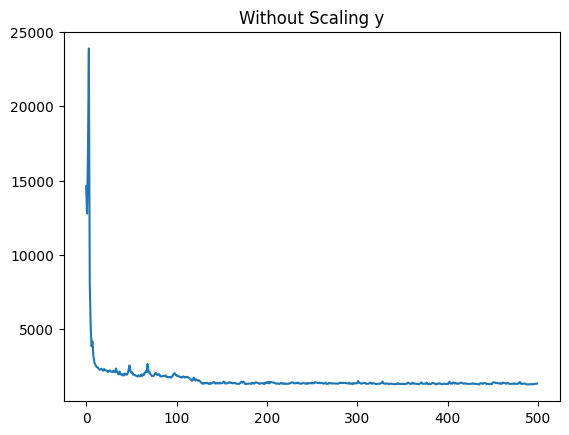

In [11]:
model1.fit(X=X,y=y,lr=0.001,epochs=500)

plt.title('Without Scaling y')
plt.plot(range(500),model1.losses,label='Loss')

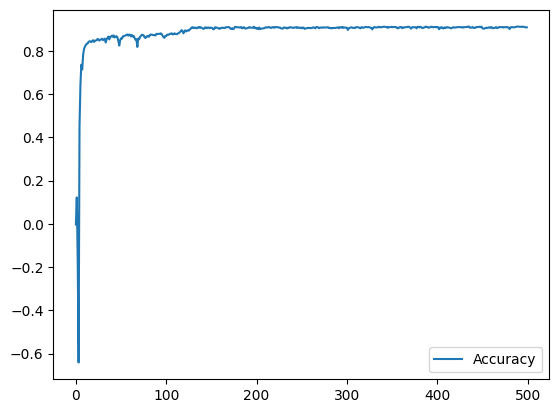

In [12]:
plt.plot(range(500),model1.accuracy_score,label='Accuracy')
plt.legend()

#### Pytorch implementation

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
input_dim = 3
hidden_dim = 5
output_dim = 1

class Regression(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(Regression, self).__init__()
        self.hidden1 = nn.Linear(input_dim, hidden_dim)
        self.act1 = nn.Tanh()
        self.out = nn.Linear(hidden_dim, output_dim)
#         self.act2 = nn.ReLU()
#         self.output = nn.Linear(8, 1)
#         self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.out(x)
        return x
    
reg_model1 = Regression(input_dim=input_dim,hidden_dim=hidden_dim,output_dim=output_dim)
print(reg_model1)

Regression(
  (hidden1): Linear(in_features=3, out_features=5, bias=True)
  (act1): Tanh()
  (out): Linear(in_features=5, out_features=1, bias=True)
)


In [16]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.SGD(reg_model1.parameters(), lr=0.001)

In [17]:
X_tensor = torch.tensor(X,dtype=torch.float32)
y_tensor = torch.tensor(y,dtype=torch.float32)

epoch: 0 loss: 14539.185546875
epoch: 50 loss: 9340.8583984375
epoch: 100 loss: 6017.89404296875
epoch: 150 loss: 4401.017578125
epoch: 200 loss: 3317.27783203125
epoch: 250 loss: 2600.75048828125
epoch: 300 loss: 2112.72705078125
epoch: 350 loss: 1760.075927734375
epoch: 400 loss: 1492.821044921875
epoch: 450 loss: 1284.66650390625


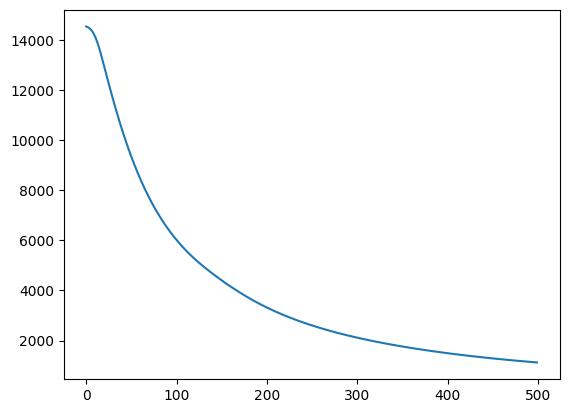

In [18]:
losses = []
for i in range(500):
    optimizer.zero_grad()
    
    ypred = reg_model1.forward(X_tensor)
    loss = loss_fn(ypred, y_tensor)
    
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if(i%50==0):
        print(f"epoch: {i} loss: {loss.item()}")
        

plt.plot(range(500),losses)

In [19]:
print(f"Weights:\n {model1.w}\nBiases:\n {model1.b}")

Weights:
 [None, array([[-59.84300544,  66.73358714, -62.56984174,  27.09423041,
        -64.70612782],
       [ 18.93406717,  34.42008417,  18.37268247,  18.18210292,
          6.01788862],
       [-77.03650399,  26.3021048 , -81.05355222,  -7.16790028,
        -79.54793797]]), array([[-45.06903663],
       [ 28.53848722],
       [-56.2008177 ],
       [ 20.80699646],
       [-61.79129372]])]
Biases:
 [None, array([  7.57077057, -27.13631948, 119.11087343, -76.43188155,
       -97.69011271]), array([36.46784861])]


In [20]:
for name,param in reg_model1.named_parameters():
    print(name,param)

hidden1.weight Parameter containing:
tensor([[ 2.2508e+00, -3.0799e-03,  2.3576e+00],
        [ 1.9600e+00, -1.7048e-02,  2.0361e+00],
        [ 1.7630e+00,  5.3493e-04,  1.8608e+00],
        [ 1.8586e+00, -2.0349e-01,  2.0006e+00],
        [ 1.8677e+00,  2.3502e-01,  1.9105e+00]], requires_grad=True)
hidden1.bias Parameter containing:
tensor([ 0.0138, -2.6468, -1.4422,  2.1454,  2.0395], requires_grad=True)
out.weight Parameter containing:
tensor([[30.2477, 31.2083, 31.0434, 29.7180, 29.7601]], requires_grad=True)
out.bias Parameter containing:
tensor([0.0602], requires_grad=True)


#### Scaling y

In [22]:
model2 = NN_regressor(layers=[3,5,1],activation='tanh',out='identity',loss_function='mse')

In [23]:
y = y/100

Epoch:0 Loss: 5.549303169652865 Accuracy: -2.811998474370065
---------------------
Epoch:10 Loss: 0.11635618817261369 Accuracy: 0.9200711155549886
---------------------
Epoch:20 Loss: 0.08033934261387206 Accuracy: 0.9448122688357047
---------------------
Epoch:30 Loss: 0.060826332778999744 Accuracy: 0.9582163957047642
---------------------
Epoch:40 Loss: 0.048595180109361105 Accuracy: 0.9666183758977777
---------------------
Epoch:50 Loss: 0.03994860562198352 Accuracy: 0.9725579916921824
---------------------
Epoch:60 Loss: 0.03324818067617458 Accuracy: 0.9771607334942044
---------------------
Epoch:70 Loss: 0.06371119559126909 Accuracy: 0.956234688758336
---------------------
Epoch:80 Loss: 0.18593686817996988 Accuracy: 0.8722738628324876
---------------------
Epoch:90 Loss: 0.039656207469356865 Accuracy: 0.9727588495796766
---------------------
Epoch:100 Loss: 0.027388028367171805 Accuracy: 0.981186264444407
---------------------
Epoch:110 Loss: 0.02024735101107568 Accuracy: 0.986091

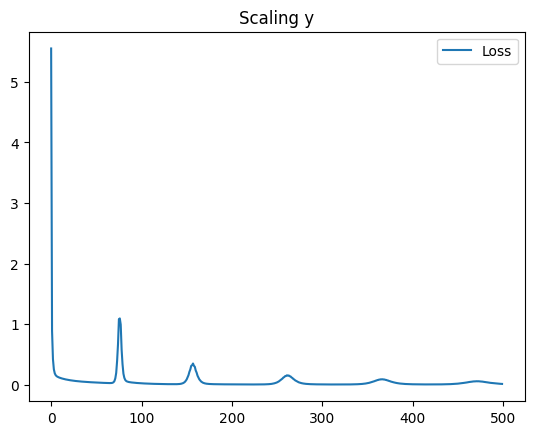

In [24]:
model2.fit(X=X,y=y,lr=0.001,epochs=500)

plt.title('Scaling y')
plt.plot(range(500),model2.losses,label='Loss')
plt.legend()

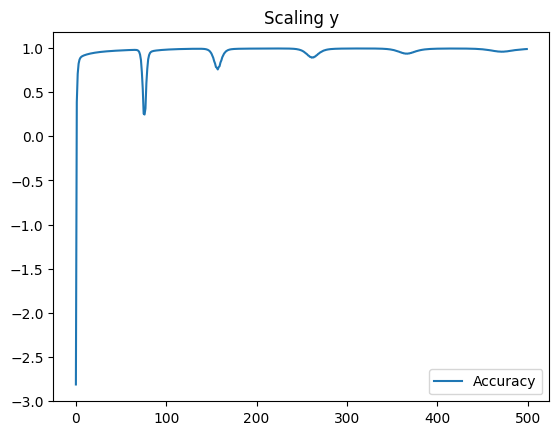

In [25]:
plt.title('Scaling y')
plt.plot(range(500),model2.accuracy_score,label='Accuracy')
plt.legend()

In [26]:
print(f"Weights:\n{model2.w}\nBiases:\n{model2.b}")

Weights:
[None, array([[ 0.68608549,  0.72454097,  0.13042808, -0.56583031,  0.17107267],
       [ 0.05965182, -1.15698787, -0.26149183, -0.06403332, -1.13654544],
       [ 0.70774339, -0.37797254,  0.53813174, -0.55963712,  1.57928166]]), array([[ 1.21057407],
       [ 0.05552835],
       [ 1.26550555],
       [-1.50482795],
       [ 0.0677863 ]])]
Biases:
[None, array([ 1.29343171,  0.28957469, -2.58623264,  0.85082952,  0.40351055]), array([1.10168606])]


In [27]:
reg_model2 = Regression(input_dim=input_dim,hidden_dim=hidden_dim,output_dim=output_dim)
print(reg_model2)

Regression(
  (hidden1): Linear(in_features=3, out_features=5, bias=True)
  (act1): Tanh()
  (out): Linear(in_features=5, out_features=1, bias=True)
)


In [28]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.SGD(reg_model2.parameters(), lr=0.001)

In [29]:
y_tensor = torch.tensor(y,dtype=torch.float32)

epoch: 0 loss: 1.553408145904541
epoch: 50 loss: 1.4114553928375244
epoch: 100 loss: 1.284270167350769
epoch: 150 loss: 1.1685174703598022
epoch: 200 loss: 1.062007188796997
epoch: 250 loss: 0.963338315486908
epoch: 300 loss: 0.8716448545455933
epoch: 350 loss: 0.7864111661911011
epoch: 400 loss: 0.7073371410369873
epoch: 450 loss: 0.6342413425445557


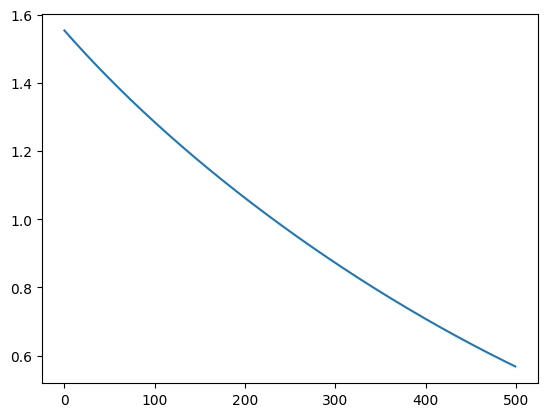

In [30]:
losses = []
for i in range(500):
    optimizer.zero_grad()
    
    ypred = reg_model2.forward(X_tensor)
    loss = loss_fn(ypred, y_tensor)
    
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if(i%50==0):
        print(f"epoch: {i} loss: {loss.item()}")
        

plt.plot(range(500),losses)

In [31]:
for name,param in reg_model2.named_parameters():
    print(name,param)

hidden1.weight Parameter containing:
tensor([[ 0.0556, -0.5293,  0.4175],
        [-0.0266, -0.1599, -0.0605],
        [ 0.4973, -0.2689,  0.0022],
        [-0.5607,  0.0382, -0.6483],
        [ 0.4547, -0.4584, -0.0522]], requires_grad=True)
hidden1.bias Parameter containing:
tensor([-0.5595, -0.1827, -0.3808,  0.3430,  0.5886], requires_grad=True)
out.weight Parameter containing:
tensor([[-0.0705, -0.2201,  0.3457, -0.6246,  0.4538]], requires_grad=True)
out.bias Parameter containing:
tensor([-0.1556], requires_grad=True)
